In [ ]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount(mountpoint, force_remount=False, timeout_ms=120000)>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tqdm
import matplotlib.pyplot as plt
from keras import preprocessing, layers, models, optimizers
import numpy as np

In [ ]:
#FAST_RUN = True # controls whether to run kernel fast
FAST_RUN = False

In [ ]:
!ls ../content/human-and-non-human/test_set/test_set

humans	non-humans


In [ ]:
!ls ../content//human-and-non-human/test_set/test_set/humans | wc -l
!ls ../content/human-and-non-human/test_set/test_set/non-humans | wc -l

1415
1309


In [ ]:
#there are about 2700 samples in the test set

In [ ]:
!ls ../content/human-and-non-human/training_set/training_set/

humans	non-humans


In [ ]:
!ls ../content/human-and-non-human/training_set/training_set/humans | wc -l
!ls ../content/human-and-non-human/training_set/training_set/non-humans | wc -l

4012
4006


In [ ]:
#there are about 8000 samples in the training set

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [ ]:
len(model.layers)

11

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
path_humans = []
train_path_humans = '../content/human-and-non-human/training_set/training_set/humans'
for path in os.listdir(train_path_humans):
    if '.jpg' in path:
        path_humans.append(os.path.join(train_path_humans, path))
path_nhumans = []
train_path_nhumans = '../content/human-and-non-human/training_set/training_set/non-humans'
for path in os.listdir(train_path_nhumans):
    if '.jpg' in path:
        path_nhumans.append(os.path.join(train_path_nhumans, path))
len(path_nhumans), len(path_humans)

(4006, 4011)

In [ ]:
# load training set
training_set = np.zeros((6000, 150, 150, 3), dtype='float32')
for i in range(6000):
    if i < 3000:
        path = path_nhumans[i]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        training_set[i] = preprocessing.image.img_to_array(img)
    else:
        path = path_humans[i - 3000]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        training_set[i] = preprocessing.image.img_to_array(img)

In [ ]:
training_set.shape

(6000, 150, 150, 3)

In [ ]:
# load validation set
validation_set = np.zeros((2000, 150, 150, 3), dtype='float32')
for i in range(2000):
    if i < 1000:
        path = path_nhumans[i + 3000]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        validation_set[i] = preprocessing.image.img_to_array(img)
    else:
        path = path_humans[i + 2000]
        img = preprocessing.image.load_img(path, target_size=(150, 150))
        validation_set[i] = preprocessing.image.img_to_array(img)

In [ ]:
validation_set.shape

(2000, 150, 150, 3)

In [ ]:
# make target tensor
train_labels = np.zeros((3000,))
train_labels = np.concatenate((train_labels, np.ones((3000,))))
validation_labels = np.zeros((1000,))
validation_labels = np.concatenate((validation_labels, np.ones((1000,))))

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(
    training_set,
    train_labels,
    batch_size=32)
validation_generator = train_datagen.flow(
    validation_set,
    validation_labels,
    batch_size=32)

In [ ]:
# when augmenting data, you need to specify the step_per_epoch
# usually, (num_samples / batch_size) * 2.5

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 3 if FAST_RUN else 30,
    validation_steps=50,
    validation_data=validation_generator,
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 5s 38ms/step - loss: 0.3596 - acc: 0.8405 - val_loss: 0.1321 - val_acc: 0.9606
Epoch 2/30
100/100 [==============================] - 4s 36ms/step - loss: 0.1165 - acc: 0.9581 - val_loss: 0.0717 - val_acc: 0.9725
Epoch 3/30
100/100 [==============================] - 4s 36ms/step - loss: 0.0636 - acc: 0.9762 - val_loss: 0.0480 - val_acc: 0.9825
Epoch 4/30
100/100 [==============================] - 4s 37ms/step - loss: 0.0415 - acc: 0.9852 - val_loss: 0.0315 - val_acc: 0.9887
Epoch 5/30
100/100 [==============================] - 4s 37ms/step - loss: 0.0338 - acc: 0.9903 - val_loss: 0.0234 - val_acc: 0.9919
Epoch 6/30
100/100 [==============================] - 4s 37ms/step - loss: 0.0227 - acc: 0.9921 - val_loss: 0.0176 - val_acc: 0.9944
Epoch 7/30
100/100 [==============================] - 4s 37ms/step - loss: 0.0144 - acc: 0.9959 - val_loss: 0.0105 - val_acc: 0.9962
Epoch 8/30
100/100 [==============================] - 4s 37ms/step - loss: 0.015

In [ ]:
model.save('human_and_dogs_non_human_1.h5')

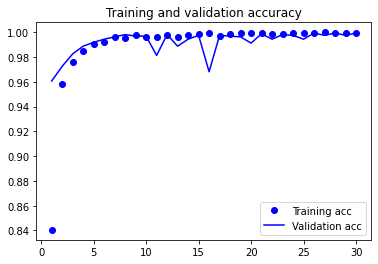

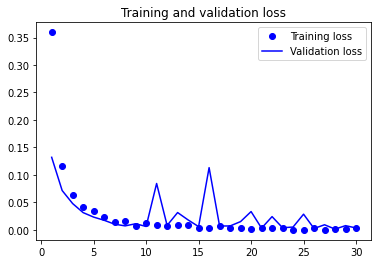

In [ ]:
# plot error curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# we're overfitting when train and validation diverge

In [ ]:
# Demo data augmentation
datagen = preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

<Figure size 432x288 with 0 Axes>

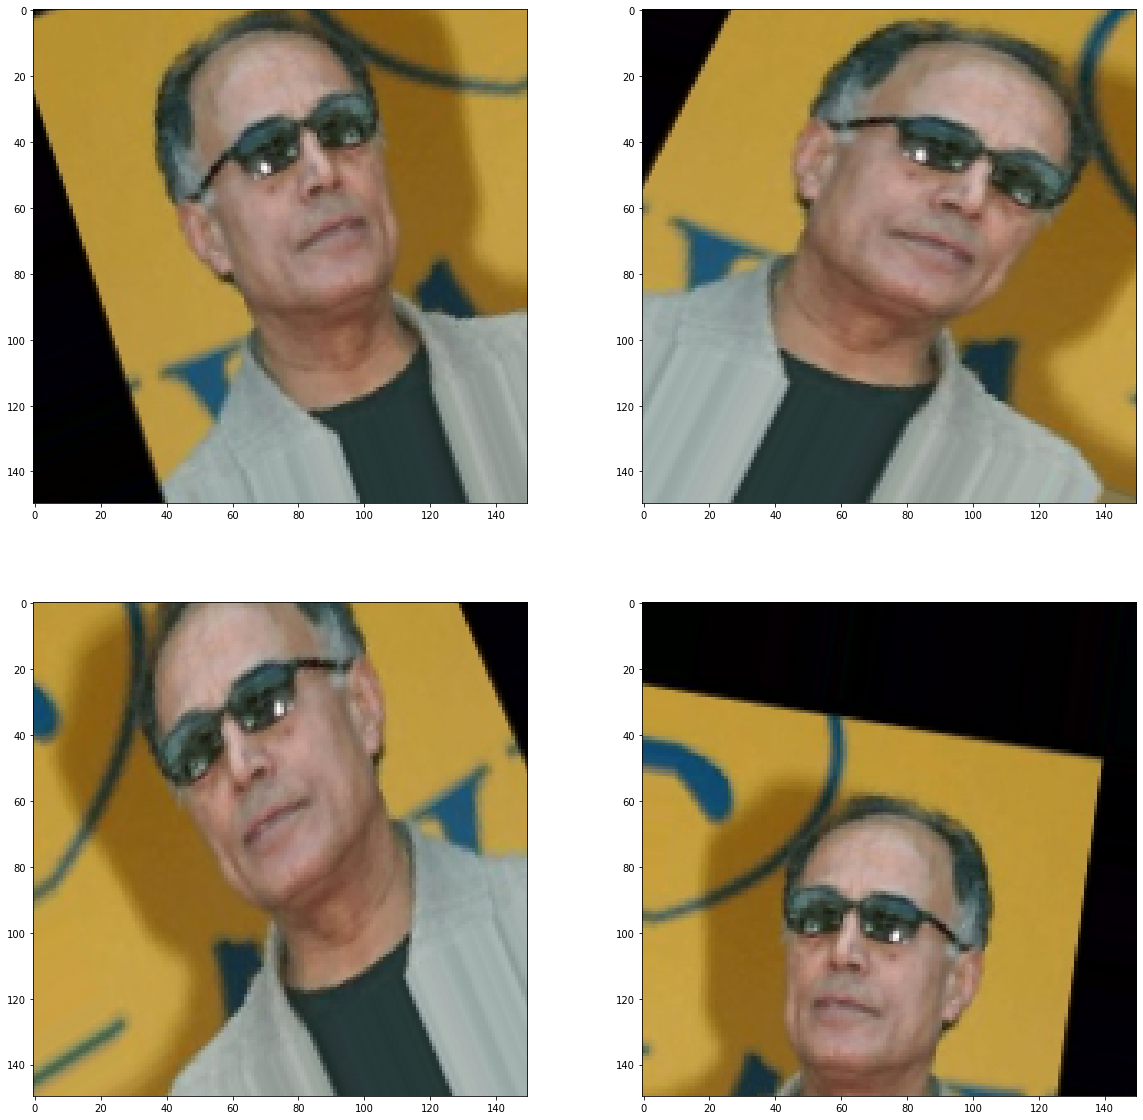

In [ ]:
# visualize data augmentations
plt.clf()
fnames = [os.path.join(train_path_humans, fname) for fname in os.listdir(train_path_humans)]
img_path = fnames[3]

img = preprocessing.image.load_img(img_path, target_size=(150, 150))
x = preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.figure(figsize=(20,20))

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i + 1)
    plt.imshow(preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
# Add a dropout layer to fight overfitting as well
model = models.Sequential()
model.add(layers.Dropout(0.5))                       # DROPOUT LAYER ADDED AS AN IMPROVEMENT TO PREVIOUS CODE
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))                       # DROPOUT
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [ ]:
# Use data augmentation
train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
train_generator = train_datagen.flow(
    training_set,
    train_labels,
    batch_size=32)

# do not augment validation data
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(
    validation_set,
    validation_labels,
    batch_size=32)

In [ ]:
# train
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 3 if FAST_RUN else 200, # use more epochs if you are not limited by 1 hour limit
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/200
100/100 [==============================] - 17s 166ms/step - loss: 0.5780 - acc: 0.6913 - val_loss: 0.5908 - val_acc: 0.7200
Epoch 2/200
100/100 [==============================] - 16s 162ms/step - loss: 0.4632 - acc: 0.7889 - val_loss: 0.5906 - val_acc: 0.6313
Epoch 3/200
100/100 [==============================] - 16s 164ms/step - loss: 0.3765 - acc: 0.8375 - val_loss: 0.4990 - val_acc: 0.7763
Epoch 4/200
100/100 [==============================] - 18s 178ms/step - loss: 0.3236 - acc: 0.8621 - val_loss: 0.7238 - val_acc: 0.6225
Epoch 5/200
100/100 [==============================] - 16s 165ms/step - loss: 0.2941 - acc: 0.8806 - val_loss: 0.6139 - val_acc: 0.6812
Epoch 6/200
100/100 [==============================] - 16s 163ms/step - loss: 0.2655 - acc: 0.8931 - val_loss: 0.8230 - val_acc: 0.5975
Epoch 7/200
100/100 [==============================] - 16s 162ms/step - loss: 0.2485 - acc: 0.9075 - val_loss: 1.2622 - val_acc: 0.5375
Epoch 8/200
100/100 [===========================

In [ ]:
model.save('humans_and_non_humans_small_2.h5')

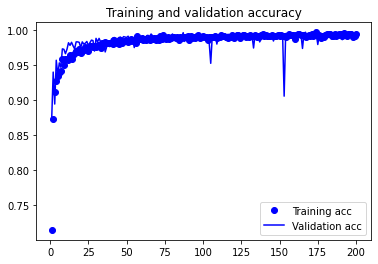

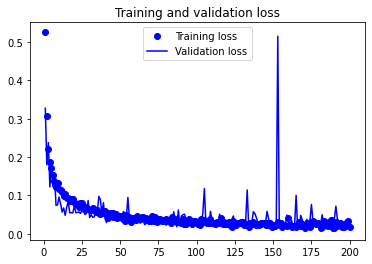

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# our accuracy keeps going up
# you are overfitting when validation accuracy goes down again

# our loss keeps going down
# you are overfitting when validation loss increases again

In [ ]:
#testing
def predictImage(filename):
    img1 = preprocessing.image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = preprocessing.image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Human",fontsize=30)
    elif val== 0:
        plt.xlabel("Non Human",fontsize=30)
predictImage("/content/profilepic/profilepic99.jpg")

In [ ]:
folder="/content/drive/MyDrive/profilepic"
for file in os.listdir(folder):
  predictImage(folder+'/'+file)